In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time
import warnings

from matplotlib.ticker import MultipleLocator

In [3]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Ariel']
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '25'
mpl.rcParams['ytick.labelsize'] = '25'

In [4]:
import sys
sys.path.append('../tools/')
from dust_extinction import calALambda
from data_binning import data_binning

color_map = {
    'cyan': '#66c2a5',
    'orange': '#ff7f00',
    'blue': '#8da0cb',
    'purple': '#7570b3',
    'pink': '#fccde5',
    'green': '#33a02c',
    'yellow': '#ffd92f',
    'brown': '#e5c494',
    'magenta': '#f1598a',
    'grey': '0.3',
    'darkgrey': '0.2'
}

In [5]:
import h5py
import astropy.constants as c
import astropy.units as u

In [6]:
obs = np.loadtxt('../../Mtot0.95/ZTF20aayhacx_20200513_NOT_v4_corrected.dat')

In [7]:
with h5py.File('../../Mtot0.95/0.87_0.08_doubledet.h5', 'r') as f:
    print(list(f.keys()))
    Lnu = np.array(f['Lnu'])
    t = np.array(f['time'][:] / 86400)
    nu = np.array(f['nu'][:])
    wv = (c.c / nu / u.Hz).to('angstrom').value

['Lnu', 'click', 'mu', 'mu_edges', 'nu', 'nu_edges', 'phi', 'phi_edges', 'time', 'time_edges']


[[17.35]]


Text(0.5, 0, '$\\lambda\\ [\\mathrm{\\mathring{A}}]$')

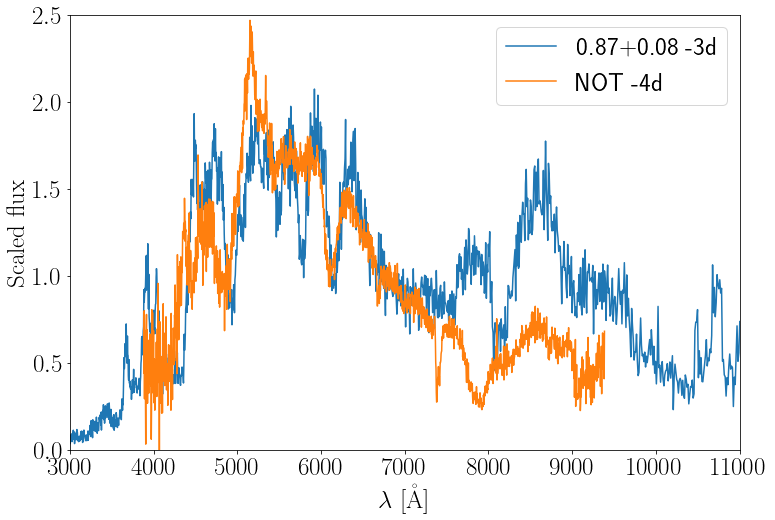

In [9]:
#arg = np.argmax(np.sum(Lnu[:, (wv<10000)&(wv>5000)], axis=1))
arg = np.argwhere(t == 17.35)
print(t[arg])
plt.figure(figsize=(12, 8))
plt.plot(wv[1:],
         Lnu[arg, 1:].ravel() /
         np.median(Lnu[arg, np.where((wv < 7000) & (wv > 6500))].ravel()),
         label='0.87+0.08 -3d')

plt.plot(obs[:, 0],
         obs[:, 1] /
         np.median(obs[np.where((obs[:, 0] < 7000) & (obs[:, 0] > 6500)), 1]),
         label='NOT -4d')
plt.legend()
plt.xlim(3000, 11000)
plt.ylim(0, 2.5)
plt.ylabel(r'$\mathrm{Scaled\ flux}$')
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')